<a href="https://colab.research.google.com/github/CharuniPremarathne/Deep_Learning_Labs/blob/main/Lab2/MLP_with_MNIST_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#import libraries
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Flatten
from tensorflow.keras.utils import to_categorical
from matplotlib import pyplot as plt
import numpy as np


Load the MNIST dataset

In [ ]:
(train_data,train_target),(test_data,test_target) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


Visualize the dataset

Target labels:  [4 0 8 1 1 0 2 7 1 7]


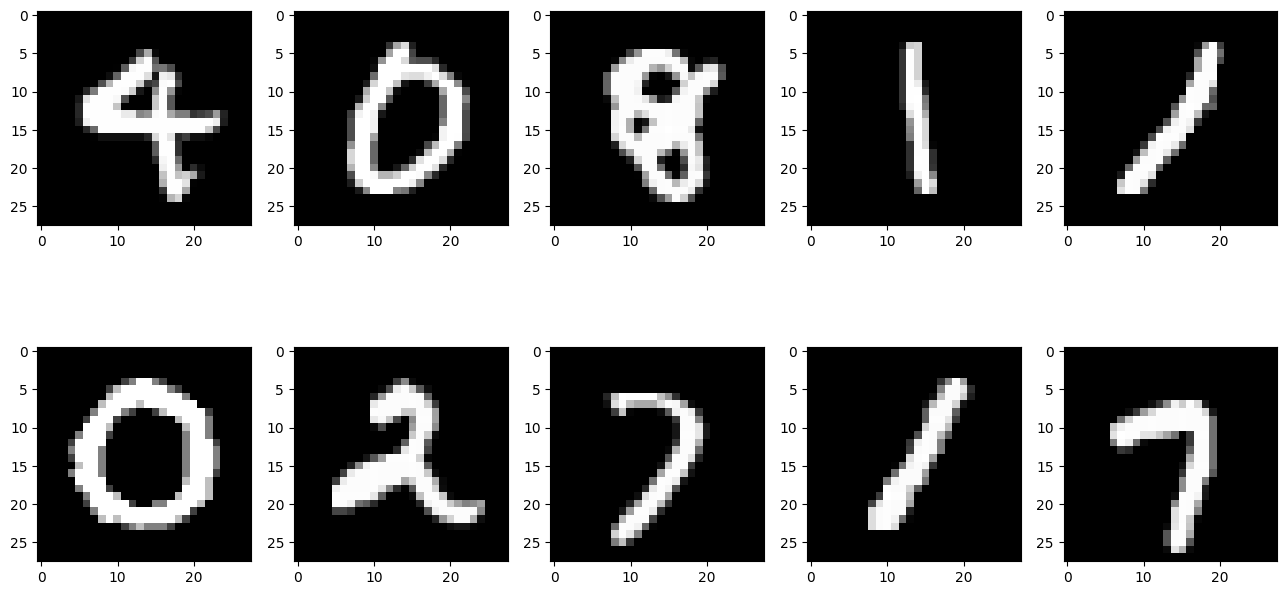

In [ ]:
fig, axs = plt.subplots(2, 5, figsize=(16,8))
random_numbers = np.random.randint(0, 60000, 10)
print('Target labels: ',train_target[random_numbers])
for idx, ax in enumerate(axs.ravel()):
    ax.imshow(train_data[random_numbers[idx]],cmap='gray')
plt.show()

Pre-processing stage

In [ ]:
new_train_data = train_data/255.0
new_test_data=test_data/255.0

new_train_target = to_categorical(train_target)
new_test_target = to_categorical(test_target)

Create the Model architecture

In [ ]:
model=Sequential()

model.add(Flatten(input_shape=(28,28)))

model.add(Dense(64,activation='relu'))
model.add(Dense(64,input_dim=64,activation='relu'))
model.add(Dense(32,input_dim=64,activation='relu'))
model.add(Dense(10,input_dim=32,activation='softmax'))
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Flatten
from keras.regularizers import l1_l2

# Create a sequential model
model = Sequential()

# Add the layers with L1 and L2 regularization
model.add(Flatten(input_shape=(28, 28)))

model.add(Dense(64, activation='relu', kernel_regularizer=l1_l2(l1=0.00001, l2=0.00001)))
model.add(Dense(64, activation='relu', kernel_regularizer=l1_l2(l1=0.00001, l2=0.00001)))
model.add(Dense(32, activation='relu', kernel_regularizer=l1_l2(l1=0.00001, l2=0.00001)))
model.add(Dense(10, activation='softmax', kernel_regularizer=l1_l2(l1=0.00001, l2=0.00001)))

# Compile the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])


In [ ]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_6 (Flatten)         (None, 784)               0         
                                                                 
 dense_24 (Dense)            (None, 64)                50240     
                                                                 
 dense_25 (Dense)            (None, 64)                4160      
                                                                 
 dense_26 (Dense)            (None, 32)                2080      
                                                                 
 dense_27 (Dense)            (None, 10)                330       
                                                                 
Total params: 56,810
Trainable params: 56,810
Non-trainable params: 0
_________________________________________________________________


Train the model

In [ ]:
train_info = model.fit(new_train_data , new_train_target , epochs = 25)

Epoch 1/25
1875/1875 [==============================] - 9s 4ms/step - loss: 0.3048 - accuracy: 0.9165
Epoch 2/25
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1525 - accuracy: 0.9631
Epoch 3/25
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1256 - accuracy: 0.9709
Epoch 4/25
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1079 - accuracy: 0.9758
Epoch 5/25
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0975 - accuracy: 0.9794
Epoch 6/25
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0909 - accuracy: 0.9819
Epoch 7/25
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0858 - accuracy: 0.9839
Epoch 8/25
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0809 - accuracy: 0.9855
Epoch 9/25
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0766 - accuracy: 0.9874
Epoch 10/25
1875/1875 [==============================] - 6s 3ms/step - loss: 0.077

Plot the loss and accuracy graphs

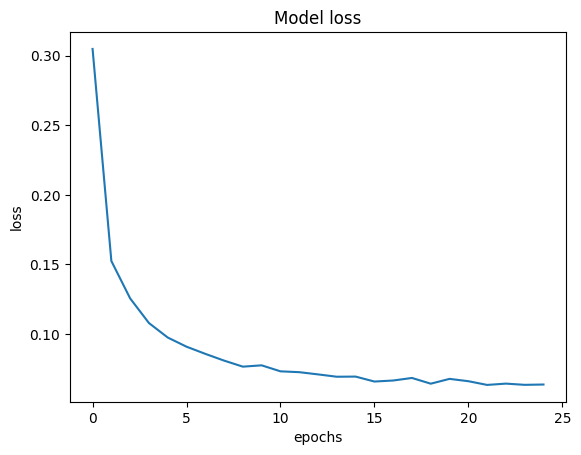

In [ ]:
plt.plot(train_info.history['loss'])
plt.xlabel('epochs')
plt.ylabel('loss')
plt.title('Model loss')
plt.show()

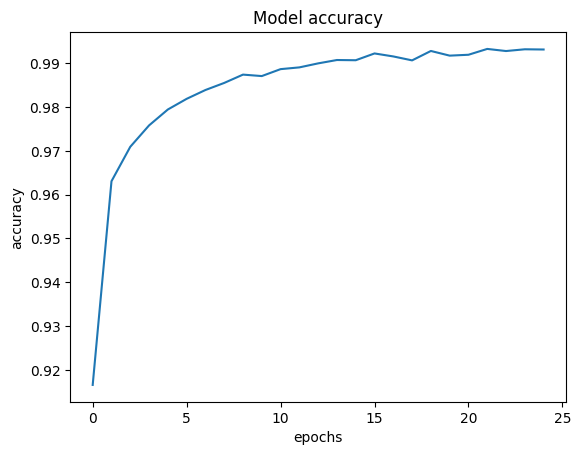

In [ ]:
plt.plot(train_info.history['accuracy'])
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.title('Model accuracy')
plt.show()

Test the performance of Model

In [ ]:
loss, acc = model.evaluate(new_test_data , new_test_target)
print(f'Loss of the Test dataset is: {loss}\nAccuracy of the test dataset is: {acc}')

313/313 [==============================] - 1s 2ms/step - loss: 0.1347 - accuracy: 0.9787
Loss of the Test dataset is: 0.13471736013889313
Accuracy of the test dataset is: 0.9786999821662903


Save the model weights

In [ ]:
model.save_weights('MNIST_WEIGHTS_V1.h5')
